In [2]:
!git clone https://github.com/caglaminametin/es411.git

Cloning into 'es411'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 76 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 20.22 KiB | 5.06 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/es411/cnn_project

/content/es411/cnn_project


In [5]:
!python main.py

2025-06-20 10:49:46.819076: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 10:49:46.835881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750416586.855510    1035 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750416586.861466    1035 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 10:49:46.881486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# ***Plotting Train and Validation Loss Graphs***

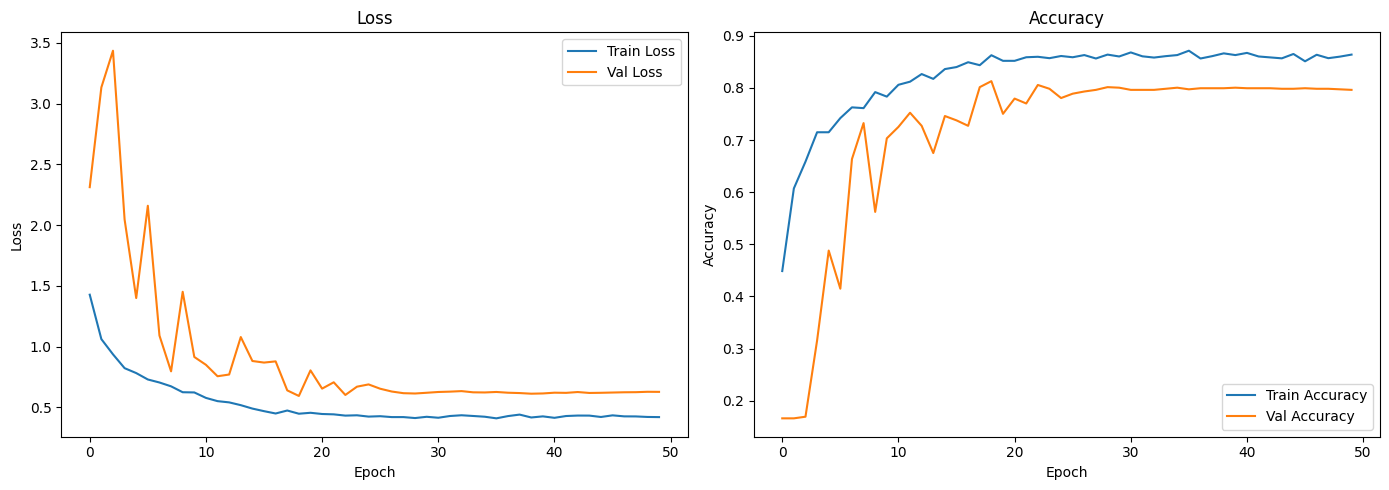

In [6]:
import json
import matplotlib.pyplot as plt

# history.json dosyasını oku (main.py tarafından üretilmiş olmalı)
with open("/content/es411/cnn_project/history.json", "r") as f:
    hist = json.load(f)

# Plotting Graph
plt.figure(figsize=(14, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(hist["loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(hist["accuracy"], label="Train Accuracy")
plt.plot(hist["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# ***Plotting Confusion Matrix***

In [8]:
import tensorflow as tf
best_model = tf.keras.models.load_model("/content/es411/cnn_project/best_model.keras")

In [11]:
from data.data_generators import get_data_generators
import yaml

In [12]:
with open("/content/es411/cnn_project/config.yaml", "r") as file:
    config = yaml.safe_load(file)

In [13]:
train_dir = config["paths"]["train_dir"]
val_dir = config["paths"]["val_dir"]
test_dir = config["paths"]["test_dir"]
input_shape = tuple(config["training"]["input_shape"])
batch_size = config["training"]["batch_size"]

_, _, test_gen = get_data_generators(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    img_size=input_shape[:2],
    batch_size=batch_size
)


Found 3350 images belonging to 6 classes.
Found 957 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


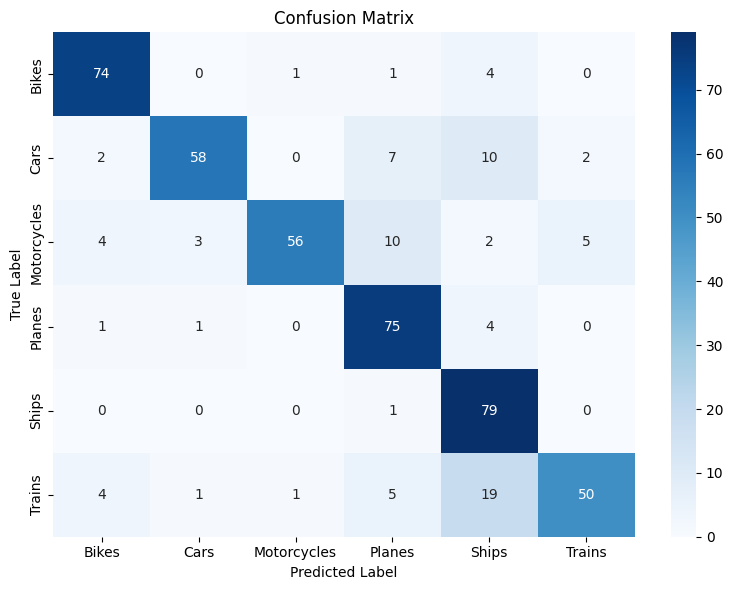


Classification Report:

              precision    recall  f1-score   support

       Bikes       0.87      0.93      0.90        80
        Cars       0.92      0.73      0.82        79
 Motorcycles       0.97      0.70      0.81        80
      Planes       0.76      0.93      0.83        81
       Ships       0.67      0.99      0.80        80
      Trains       0.88      0.62      0.73        80

    accuracy                           0.82       480
   macro avg       0.84      0.82      0.81       480
weighted avg       0.84      0.82      0.81       480



In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Tahminleri al
y_pred_probs = best_model.predict(test_gen, steps=len(test_gen), verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# (İsteğe bağlı) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
